# Exploring the Data Challenge

Today, we will work to explore a new dataset using our earlier EDA strategies.  We will also discuss presentation graphics, and customizations with matplotlib.  To begin, let's explore the Custome Churn dataset.


### Customer Churn



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#load the data
telecom = pd.read_csv('data/pandas_practice_data/telecom_churn.csv')

In [3]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [4]:
telecom['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [5]:
telecom['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

Note that Churn is presently a Boolean type.  We can change this to integer type, and subsequently understand something about what percentage of our customers have been churned.

In [6]:
telecom['Churn'] = telecom['Churn'].astype('int64')

In [7]:
telecom['Churn'].mean()

0.14491449144914492

If we wanted to understand something about the differences between these groups -- churned or not -- we might look at the average use of all services in each.  We do this with a boolean index, then find the mean of the results.

In [8]:
telecom[telecom['Churn'] == 1].mean()

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

In [9]:
telecom[telecom['Churn'] == 0].mean()

Account length            100.793684
Area code                 437.074737
Number vmail messages       8.604561
Total day minutes         175.175754
Total day calls           100.283158
Total day charge           29.780421
Total eve minutes         199.043298
Total eve calls           100.038596
Total eve charge           16.918909
Total night minutes       200.133193
Total night calls         100.058246
Total night charge          9.006074
Total intl minutes         10.158877
Total intl calls            4.532982
Total intl charge           2.743404
Customer service calls      1.449825
Churn                       0.000000
dtype: float64

In Pandas, the `.value_counts()` method works on data that is type `object` and `bool`.  Thus, we can examine the counts for these categories easily as follows.

In [10]:
telecom.describe(include = ['object'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [11]:
telecom[telecom['Churn'] == 1].describe(include = ['object'])

,State,International plan,Voice mail plan
count,483,483,483
unique,51,2,2
top,NJ,No,No
freq,18,346,403


We can also use the `.groupyby()` method to investigate the different distributions within churn categories.

In [12]:
telecom.groupby(['Churn'])['Total day minutes'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,2850.0,175.175754,50.181655,0.0,142.825,177.2,210.30,315.6
1,483.0,206.914079,68.997792,0.0,153.250,217.6,265.95,350.8


In [13]:
telecom.groupby(['Churn'])['Total day minutes'].describe(percentiles = [])

,count,mean,std,min,50%,max
Churn,,,,,,
0,2850.0,175.175754,50.181655,0.0,177.2,315.6
1,483.0,206.914079,68.997792,0.0,217.6,350.8


We saw the `.map()` method last class, and we can use it again here to change the values of the International plan and Voice mail plan columns.  

In [14]:
plan = {'No': False, 'Yes': True}

In [15]:
telecom['Voice mail plan'] = telecom['Voice mail plan'].map(plan)

In [16]:
telecom['Voice mail plan'].head()

0     True
1     True
2    False
3    False
4    False
Name: Voice mail plan, dtype: bool

Note that we've also changed the data type.  Finally, we can use the `.crosstab()` display to see relationships between the international plan carriers and churn.

In [17]:
pd.crosstab(telecom['Churn'], telecom['International plan'])

International plan,No,Yes
Churn,,
0,2664,186
1,346,137


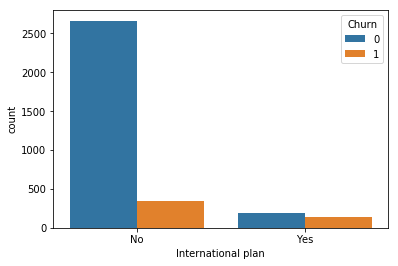

In [18]:
sns.countplot('International plan', hue = 'Churn', data = telecom)

In [19]:
pd.crosstab(telecom['Churn'], telecom['Customer service calls'])

Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0
1,92,122,87,44,76,40,14,5,1,2


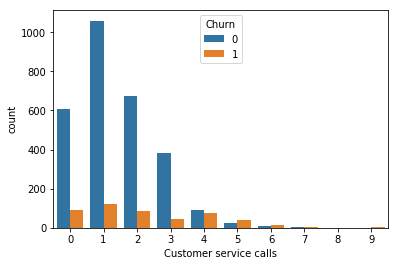

In [20]:
sns.countplot('Customer service calls', hue = 'Churn', data = telecom)

Text(0.5,1,'Total International Calls')

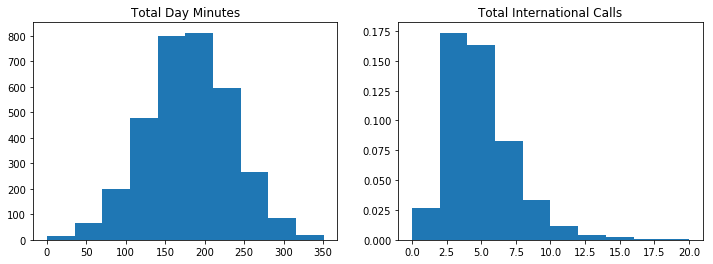

In [21]:
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.hist(telecom['Total day minutes'])
plt.title('Total Day Minutes')

plt.subplot(1, 2, 2)
plt.hist(telecom['Total intl calls'], density = True)
plt.title('Total International Calls')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1038b5860>,
      dtype=object)

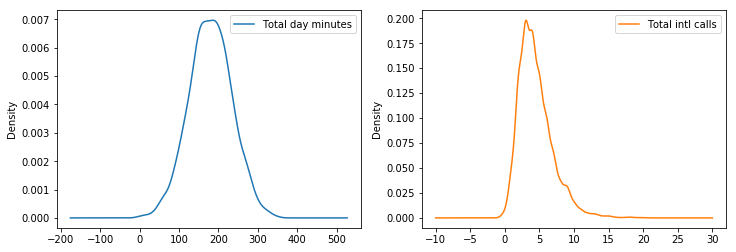

In [22]:
telecom[['Total day minutes', 'Total intl calls']].plot(kind='density', subplots=True, 
                  layout=(1, 2), sharex=False, figsize=(12, 4))

### Exercise

1. Hypothesize some additional questions to consider in your EDA.
2. Use Pandas to explore your questions.
3. Generate additional questions while conducting analysis.
4. What kinds of things do you believe are surfaced in terms of factors leading to customer churn?

In [23]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null bool
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64
Ch

In [37]:
pd.crosstab(telecom['Churn'], telecom['Total intl calls'])

Total intl calls,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Churn,,,,,,,,,,,,,,,,,,,,,
0,18,129,381,570,540,419,293,191,105,95,...,24,14,13,5,4,2,1,3,1,0
1,0,31,108,98,79,53,43,27,11,14,...,4,1,1,1,3,0,0,0,0,1


In [38]:
sns.countplot('Total intl calls', Hue = 'Churn', Data = telecom)

ValueError: Could not interpret input 'Total intl calls'

Text(0.5,1,'Total Evening Charge')

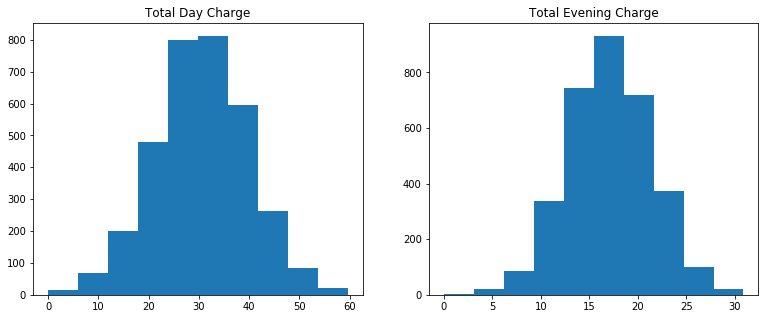

In [31]:
plt.figure(figsize = (13, 5))
plt.subplot(1, 2, 1)
plt.hist(telecom['Total day charge'])
plt.title('Total Day Charge')

plt.subplot(1, 2, 2)
plt.hist(telecom['Total eve charge'])
plt.title('Total Evening Charge')

In [39]:
corr = telecom.corr()

In [40]:
corr.head()

,Account length,Area code,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Voice mail plan,0.002918,-0.000747,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
Number vmail messages,-0.004628,-0.001994,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151


In [41]:
corr['Churn'].head()

Account length           0.016541
Area code                0.006174
Voice mail plan         -0.102148
Number vmail messages   -0.089728
Total day minutes        0.205151
Name: Churn, dtype: float64

In [42]:
import seaborn as sns

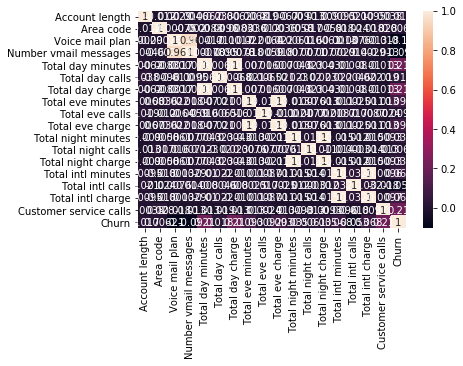

In [44]:
sns.heatmap(corr, annot=True)